In [62]:
%matplotlib notebook

from modsim import *

In [63]:
m = UNITS.meters
s = UNITS.seconds

In [64]:
import random

In [65]:
condition = Condition(floorheight = 3,
                     num_floors = 1,
                     v_max = .762,
                     a_max = .65)

In [66]:
# 18 seconds for elevator to start, 9 to stop, 13 between floors

In [67]:
def find_magic_num(v_max, a_max):
    t = v_max / a_max
    num_magic = .5 * a_max * t **2 + v_max * t
    return num_magic

In [68]:
find_magic_num(condition.v_max, condition.a_max)

1.3399476923076923

In [76]:
def make_system(condition):
    unpack(condition)
    height = floorheight * num_floors
    init = State(y = 0, vy = 0)
    ts = linspace(0,50,1001)
    magic_num = find_magic_num(v_max, a_max)
    return System(init = init, a_max = a_max, v_max = v_max, magic_num = magic_num, height = height, ts = ts)

    

In [70]:
system = make_system(condition)


In [71]:
def slope_func(state, t, system):
    unpack(system)
    y, vy = state
    ay = a_max
    #if (t < 18):
        #return vy,0
    if(y > height - magic_num):
        ay = -a_max 
        return vy, ay
    ##if(y> height):
      #  system.end_time = t
    if(vy > v_max):
        ay = 0
        
    return vy,ay

In [73]:
#same as slope_func but with time delay
def slope_func2(state, t, system):
    unpack(system)
    y, vy = state
    ay = a_max
    if (t < 18):
        return vy,0
    if(y > height - magic_num):
        ay = -a_max 
        return vy, ay
    if(vy > v_max):
        ay = 0
        
    return vy,ay

In [11]:
system.magic_num

1.3399476923076923

In [77]:
run_odeint(system,slope_func2)
find_end_time(system)

21.400000000000002

<IPython.core.display.Javascript object>


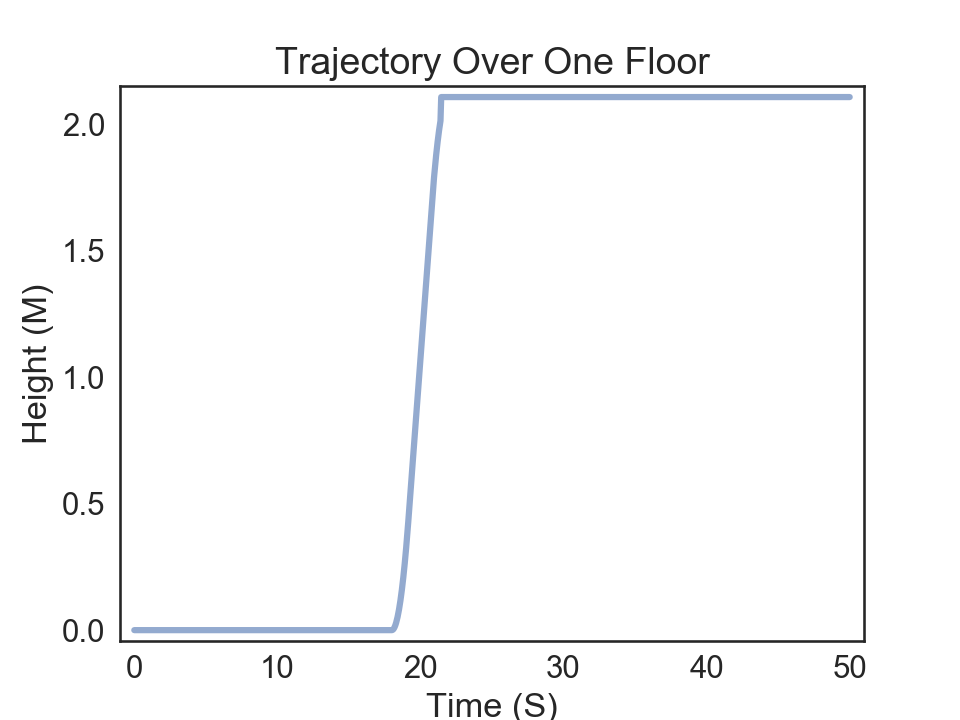

Saving figure to file trajectory1


In [81]:
newfig()
plot(system.results.y)
title("Trajectory Over One Floor")
xlabel("Time (S)")
ylabel("Height (M)")
savefig('trajectory1')

<IPython.core.display.Javascript object>


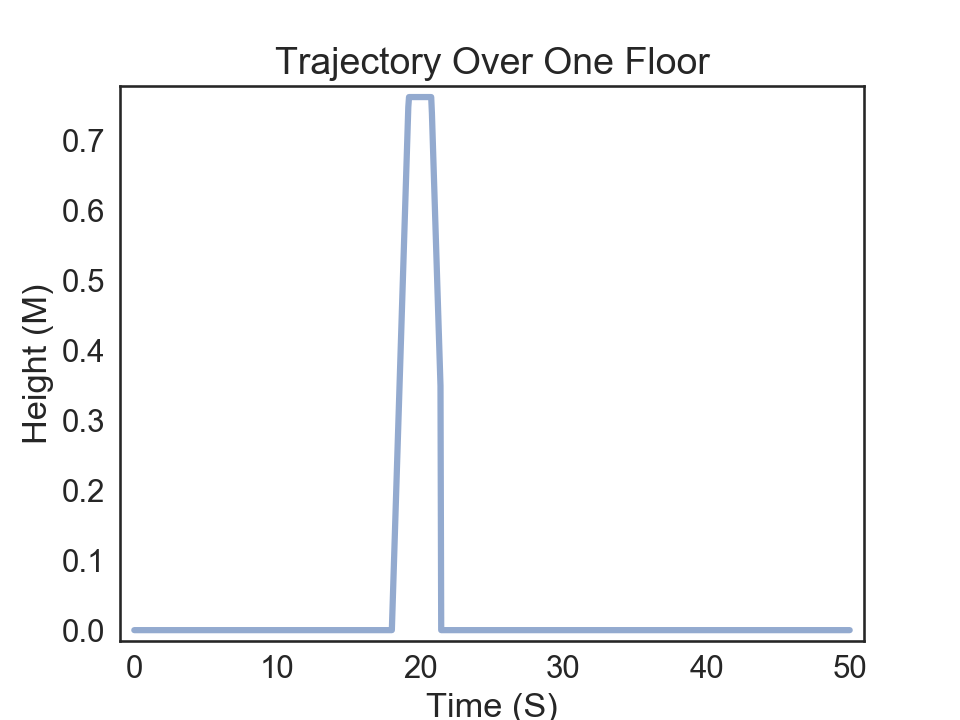

Saving figure to file velocity1


In [75]:

newfig()
plot(system.results.vy)
system.height
title("Velocity Over One Floor")
xlabel("Time (S)")
ylabel("Velocity (m/s)")
savefig('velocity1')

In [22]:
def find_end_time(system):
    t = 1000000
    for i in range(1001):
        if(system.results.y[i * .05] >= system.results.y.max() - .1):
            t = i * .05
            break
    for j in range(1001):
        if(j > t / .05):
            system.results.vy[j *.05] = 0
            system.results.y[j * .05] = system.results.y.max()
    return t

In [23]:
run_odeint(system, slope_func)
system.results.y.max()

2.1066994259736478

In [24]:
run_odeint(system, slope_func)
find_end_time(system)

3.4000000000000004

In [28]:
#newfig()
#plot(system.results.y)

In [34]:
def multiple_floors(floors):
    total_time = 0
    for i in range(len(floors) - 1):
        if(floors[i] != floors[i+1]):
            condition = Condition(floorheight = 3,
                                  num_floors = floors[i + 1] - floors[i],
                                  v_max = .762,
                                  a_max = .65)
            system = make_system(condition)
            run_odeint(system,slope_func)
            total_time += find_end_time(system) + 13
    total_time += 14
    return total_time
        

In [35]:
#^ THIS WORKS

In [36]:
print(multiple_floors([0,10,12]))

86.2


In [39]:
#this guy sweeps how long it takes with no extra stops
def sweep_basic_floors(max):
    sweep = SweepSeries()
    sweep[0] = 0
    for i in range(max):
        condition = Condition(floorheight = 3,
                     num_floors = i,
                     v_max = .762,
                     a_max = .65)
        system = make_system(condition)
        run_odeint(system,slope_func)
        sweep[i + 1] = find_end_time(system) + 27
        #27 = 18 s start, 9 s stop
    return sweep

In [42]:
#^this works!!
sweep = sweep_basic_floors(10)
#plot(sweep)

In [43]:
def sweep_3_people(max):
    sweep = SweepSeries()
    sweep[0] = 0
    for i in range(max):
        floors = [0,random.randint(1,i + 1), random.randint(1,i + 1), i + 1]
        floors.sort()
        sweep[i+ 1] = multiple_floors(floors)
    return sweep

In [46]:
#^This works!
sweep2 = sweep_3_people(5)
#plot(sweep2)

In [48]:
def sweep_7_people(max):
    sweep = SweepSeries()
    sweep[0] = 0
    for i in range(max):
        floors = [0,random.randint(1,i + 1), random.randint(1,i + 1), random.randint(1,i + 1), random.randint(1,i + 1), random.randint(1,i + 1), random.randint(1,i + 1), i + 1]
        floors.sort()
        sweep[i+ 1] = multiple_floors(floors)
    return sweep

In [51]:
#^ P sure this works!
sweep3 = sweep_7_people(5)
#plot(sweep3)
#plot(sweep2)

In [52]:
def walking(max):
    sweep = SweepSeries()
    for i in range(max + 1):
        sweep[i] = 18.75* i
    return sweep

In [53]:
sweep = sweep_basic_floors(5)
sweep2 = sweep_3_people(5)
sweep4 = walking(5)
sweep3 = sweep_7_people(5)


<IPython.core.display.Javascript object>


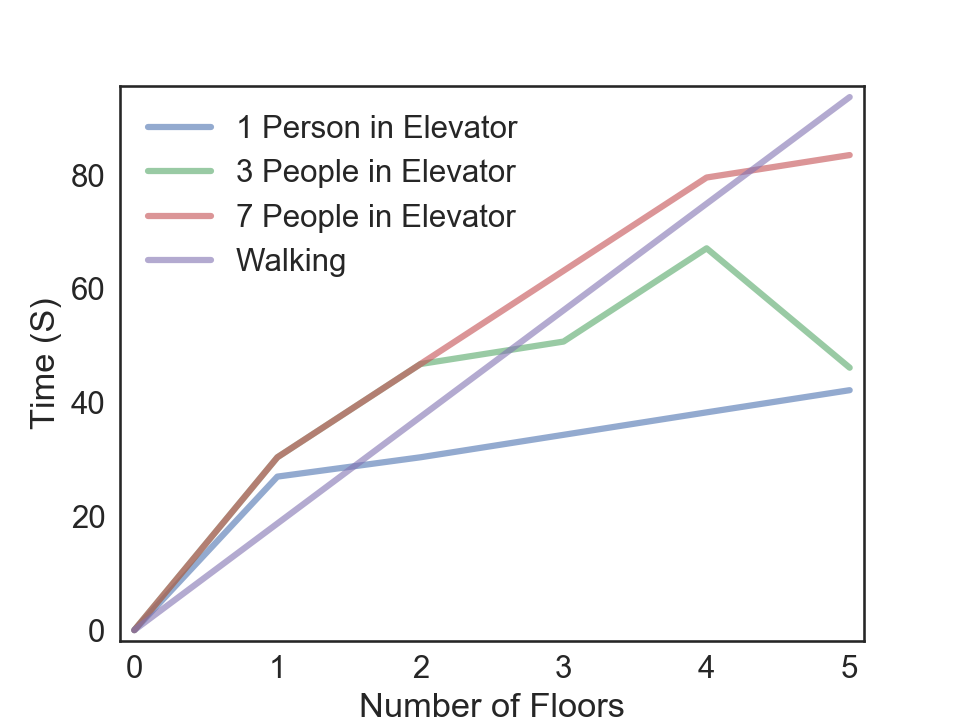

Saving figure to file finalsweep


In [59]:
newfig()
plot(sweep, label = '1 Person in Elevator')
plot(sweep2, label = '3 People in Elevator')
plot(sweep3, label = '7 People in Elevator')
plot(sweep4, label = 'Walking')
decorate(xlabel='Number of Floors',
         ylabel='Time (S)')
savefig('finalsweep')
#everything works now but the labels! wtf labels??


In [56]:
plot(sweep, 'bo', label='glucose')
decorate(xlabel='Time (min)',
         ylabel='Concentration (mg/dL)')